In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

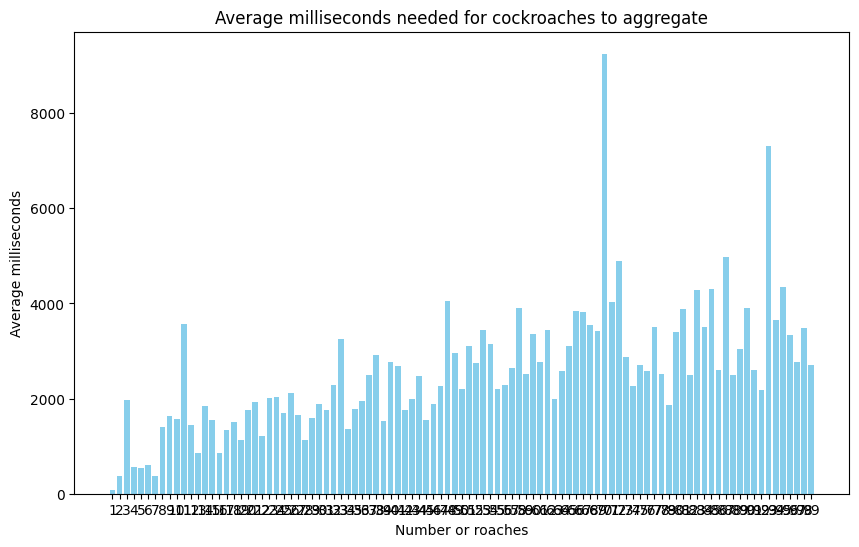

In [2]:
# Load the dataset
data = pd.read_csv('dataset_symmetric.csv', header=None, names=['Variable1', 'Variable2'])

# Calculate the average of the second variable grouped by the first variable
grouped_data = data.groupby('Variable1')['Variable2'].mean().reset_index()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Variable1'], grouped_data['Variable2'], color='skyblue')
plt.xlabel('Number or roaches')
plt.ylabel('Average milliseconds')
plt.title('Average milliseconds needed for cockroaches to aggregate')
plt.xticks(grouped_data['Variable1'])
plt.show()

Mean Squared Error: 1003065.9112919804
R-squared: 0.38348795923199097


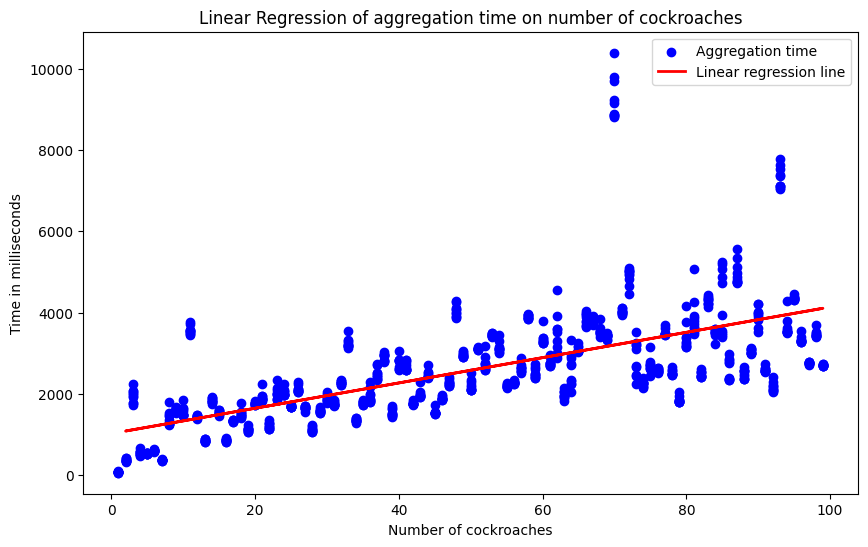

In [3]:


# Load the dataset
data = pd.read_csv('dataset_symmetric.csv', header=None, names=['Variable1', 'Variable2'])

# Shuffle and split the data into training and testing sets
X = data[['Variable1']]
y = data['Variable2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Fit a linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Aggregation time')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear regression line')
plt.xlabel('Number of cockroaches')
plt.ylabel('Time in milliseconds')
plt.title('Linear Regression of aggregation time on number of cockroaches')
plt.legend()
plt.show()


Mean Squared Error: 746082.623176035


c:\Users\wasil\anaconda3\envs\ml01\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


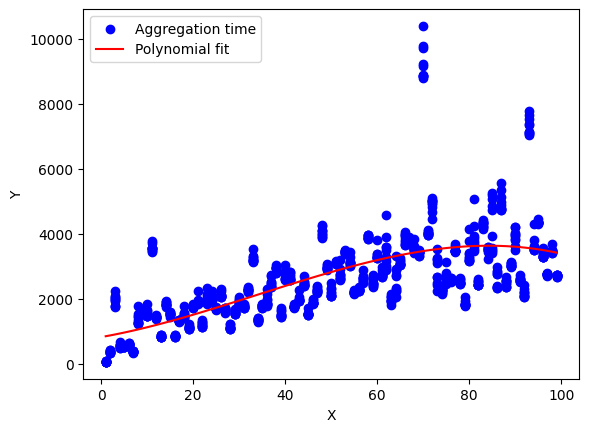

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('dataset_symmetric.csv', header=None, names=['X', 'Y'])

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Split the dataset into features (X) and target (Y)
X = df[['X']]
Y = df['Y']

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Transform the features to polynomial features
degree = 3  # You can change the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting the results
plt.scatter(X, Y, color='blue', label='Aggregation time')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, Y_range_pred, color='red', label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Mean Squared Error: 21728.48634281528
Mean Absolute Error: 91.46305515472183
R-squared: 0.9815450799111933


c:\Users\wasil\anaconda3\envs\ml01\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


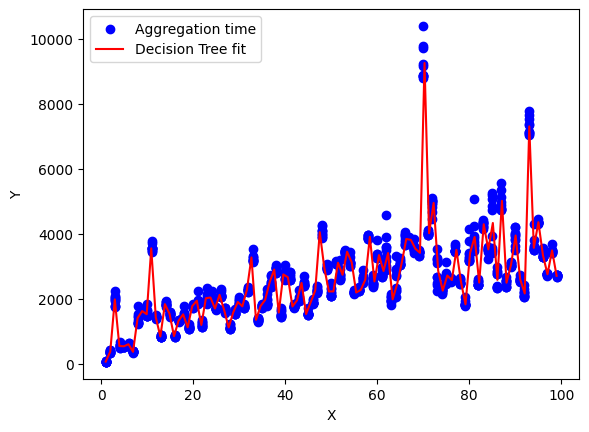

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('dataset_symmetric.csv', header=None, names=['X', 'Y'])

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Split the dataset into features (X) and target (Y)
X = df[['X']]
Y = df['Y']

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plotting the results
plt.scatter(X, Y, color='blue', label='Aggregation time')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_range_pred = model.predict(X_range)
plt.plot(X_range, Y_range_pred, color='red', label='Decision Tree fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     587.2
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.96e-97
Time:                        02:28:14   Log-Likelihood:                -6624.0
No. Observations:                 792   AIC:                         1.325e+04
Df Residuals:                     790   BIC:                         1.326e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1014.1491     74.843     13.550      0.0

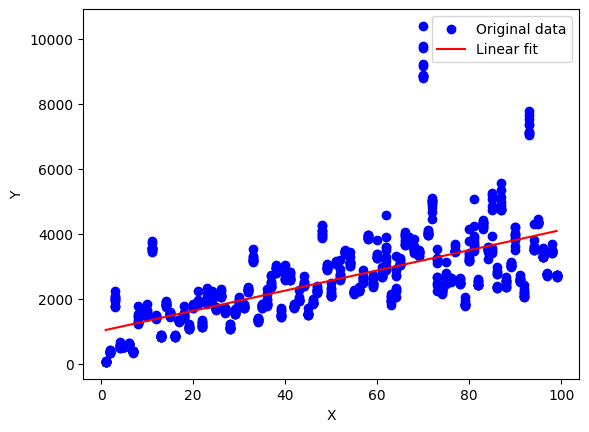

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('dataset_symmetric.csv', header=None, names=['X', 'Y'])

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Split the dataset into features (X) and target (Y)
X = df[['X']]
Y = df['Y']

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Add a constant to the input features (intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the linear regression model using statsmodels
model = sm.OLS(Y_train, X_train_const).fit()

# Print the model summary to get p-values and other statistics
print(model.summary())

# Predict on the test set
Y_pred = model.predict(X_test_const)

# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plotting the results
plt.scatter(X, Y, color='blue', label='Original data')
X_range = np.linspace(X.min(), X.max(), 100)
X_range_const = sm.add_constant(X_range)
Y_range_pred = model.predict(X_range_const)
plt.plot(X_range, Y_range_pred, color='red', label='Linear fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
